# Ml Based Approach

### Task is to find number of positive or negative reviews a particular business will recieve based on past

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Taking Vegas restaurents as data

In [3]:
df = pd.read_csv('Filtered_Vegas_Restaurants.csv')

In [4]:
df

,Address,attributes.RestaurantsAttire,attributes.WheelchairAccessible,attributes.WiFi,Business Id,City,Cool,Date,Funny,Is Open,...,Neighborhood,Postal Code,Review Count,Review Id,Business_Stars,User_Stars,State,Text,Useful,User Id
0,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,10,12/23/2015,9,1,...,The Strip,89109.0,887,LwszgYoywAhMaIdt3zPgug,3.0,4,NV,Crave those crazy squares!! Not breakfast cere...,10,bLbSNkLggFnqwNNzzq-Ijw
1,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,2,7/19/2015,2,1,...,The Strip,89109.0,887,wxKpyfSQPMGNHSKWFFIbDQ,3.0,3,NV,"Well, White Castle kind of is what it is... I ...",8,w0Yyvns5BCIL5s_7JuFrug
2,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,0,8/30/2015,2,1,...,The Strip,89109.0,887,6aea4wdfhHzvo3d8qeMd8A,3.0,4,NV,"It was my first time at a White Castle, and af...",0,C1K9VHWJuBInQTNBEfWqhw
3,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,0,7/2/2016,0,1,...,The Strip,89109.0,887,kTdvdp0dFu2Q4hAO4hk2Dw,3.0,4,NV,Located inside the Casino Royale Hotel & Casin...,0,VYOQLKuR0Ugy9lU-QiOuLw
4,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,0,9/13/2015,0,1,...,The Strip,89109.0,887,NP6Jtv8FKKw_cC1owTApiA,3.0,2,NV,White castle burgers are good if you only eat ...,0,Fk8c0UqT0cTBp265DHfwSQ
5,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,1,6/1/2015,2,1,...,The Strip,89109.0,887,hwEz-5l4BP5nYoGZD9xDrg,3.0,2,NV,What a disappointment! I was really looking f...,1,qlaVQkSxKcqfHJhoZU3rKg
6,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,5,2/21/2015,9,1,...,The Strip,89109.0,887,s2MW1ToXDIsD-WcdV__dPQ,3.0,2,NV,I am being generous with 2 stars.\nSo disappoi...,5,8OeTLey-p-WaL9ErNEci1Q
7,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,0,2/4/2017,0,1,...,The Strip,89109.0,887,DatXS-O-cpyMoLDY8Itiog,3.0,3,NV,"Yes they have come to the strip, yes they are ...",1,s_JDz1gBlk8nDgwiFj9_cA
8,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,1,2/8/2016,0,1,...,The Strip,89109.0,887,1nTrqKQM9-Hyt8FRFA3MPw,3.0,3,NV,We went here for a snack. Overall it is a che...,1,8rzqG5NLuDlnqE49USzvTw
9,3411 S Las Vegas Blvd,casual,True,no,dKdApYVFDSNYsNOso6NYlA,Las Vegas,2,2/9/2015,4,1,...,The Strip,89109.0,887,BgfI04_e-FbVpKCEywaQ_Q,3.0,3,NV,Let's get this out of the way: this is not a f...,10,_VMGbmIeK71rQGwOBWt_Kg


Selected this particular business for testing 

In [5]:
business = df.loc[df['Business Id'] == "4JNXUYY8wbaaDmk3BPzlWw"]

In [6]:
business

,Address,attributes.RestaurantsAttire,attributes.WheelchairAccessible,attributes.WiFi,Business Id,City,Cool,Date,Funny,Is Open,...,Neighborhood,Postal Code,Review Count,Review Id,Business_Stars,User_Stars,State,Text,Useful,User Id
1096,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,12/10/2014,0,1,...,The Strip,89109.0,6979,zG2QQSsPavYBZonWo86vjA,4.0,4,NV,On my last trip to Vegas I made it a point to ...,0,qHmLQQZF1GKrU6HFZqZqGA
1097,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,5/23/2009,0,1,...,The Strip,89109.0,6979,hzM_bJcDhom1ARCGUvLNuA,4.0,4,NV,"So i have to give it to this place,Just a Grea...",0,UtmsHIyNNgeVZlm6CYLWjA
1098,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,3,10/6/2015,0,1,...,The Strip,89109.0,6979,rZwdy71foWJMpzZoC4m13g,4.0,3,NV,This place is huge!! I've only been here twice...,2,w8QdFtVKqtGn9QhkRDbAFQ
1099,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,4/5/2014,0,1,...,The Strip,89109.0,6979,-535OhvuI9L0ig3Y6ZPtYg,4.0,3,NV,Kim made reservations at this place that is lo...,0,8a0GHVSVs3rSRtNIIR4rlw
1100,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,4/26/2012,0,1,...,The Strip,89109.0,6979,mGuzjaUfvQei28va3eSmPg,4.0,3,NV,Love this place!!!! Perfect location on the st...,0,#NAME?
1101,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,3,3/12/2014,3,1,...,The Strip,89109.0,6979,1I2KiX072utcHjlxMYpsxg,4.0,2,NV,To me this is just not worth the money given s...,3,s-591-mtIyP7F1Lffw98jw
1102,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,1,3/30/2017,1,1,...,The Strip,89109.0,6979,Tom-RSAOZq_bE--dUrfA6Q,4.0,5,NV,Why 5 Stars in a touristy bistro? Because sinc...,3,8e2KqFt1W67MA3ah09IYbw
1103,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,9/26/2013,0,1,...,The Strip,89109.0,6979,UUi6P9kJvxmkXirQmLnr_g,4.0,4,NV,"Great food, better service and I definetly a g...",0,tO8C0fsWJ_ylxNCQlITAPg
1104,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,6/21/2014,0,1,...,The Strip,89109.0,6979,pZsMU80O1z8JKGKfUtm2-Q,4.0,4,NV,Really good food at decent prices (for being o...,0,YcaO4xCNgt123pNHsJkS_Q
1105,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,6/27/2016,0,1,...,The Strip,89109.0,6979,vU9-T_U3opeVjpaVFqjEXw,4.0,4,NV,Great brunch spot! Food is delicious and alway...,0,cYXPnVBFmggagWbE3jYXKw


In [7]:
type(business)

pandas.core.frame.DataFrame

In [8]:
business['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Sorting the business attributes by date

In [9]:
sorted_business = business.sort_values(['Date'], ascending=[True])
sorted_business

,Address,attributes.RestaurantsAttire,attributes.WheelchairAccessible,attributes.WiFi,Business Id,City,Cool,Date,Funny,Is Open,...,Neighborhood,Postal Code,Review Count,Review Id,Business_Stars,User_Stars,State,Text,Useful,User Id
108402,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,3,2005-12-02,2,1,...,The Strip,89109.0,6979,6HswqFO2yndpRGCe2gIAwg,4.0,4,NV,Though heartbroken and a bit aimless on my 22n...,3,gjhzKWsqCIrpEd9pevbKZw
28173,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,2007-02-27,0,1,...,The Strip,89109.0,6979,v3kfvfkh0eGFtt0Y67JNuw,4.0,5,NV,"My experience at Mon Ami Gabi was amazing, and...",0,VJ6gRN2AGplIhnyVA_mMxg
148894,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,2007-06-14,0,1,...,The Strip,89109.0,6979,6HdLSTrfg9E_cs1TqEZBlg,4.0,5,NV,There is nothing better than sitting outside w...,1,ko06Ptkr1YtZWR6FIDqubA
14894,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,2007-06-14,0,1,...,The Strip,89109.0,6979,F5mayOlMfefDNR5nHf-skA,4.0,5,NV,"I am not an authority on French cuisine, but ...",0,xgcxhbbnokR-ZBazUrtXnA
157349,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,2,2007-06-22,0,1,...,The Strip,89109.0,6979,L0CS3BCRlWGJKIHjqYt-6w,4.0,4,NV,It's a chain restaurant. And what's with the ...,2,qDi5XvihmkuTWLhaw3f3Fw
176045,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,2007-07-09,0,1,...,The Strip,89109.0,6979,7yJovp0H5P7JyoeeVpXlbg,4.0,4,NV,"I really want to give this place 4 1/2 stars, ...",1,zXj4PlDxzh7cVl9wM7x2sA
102745,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,0,2007-07-26,0,1,...,The Strip,89109.0,6979,xEVNBfAeio3PNSqCP8wvJQ,4.0,4,NV,I love French Food and having lived in France ...,1,Ic2wLF5mxzu6VrcV46gCOA
86201,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,1,2007-09-08,1,1,...,The Strip,89109.0,6979,qW0O77lZ9vWP69r_RTdoLA,4.0,2,NV,Four stars?!? C'mon people.\n\nWe ate here fo...,3,4k9-LoufKfGflVzQfmkrdw
74226,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,2,2007-10-10,1,1,...,The Strip,89109.0,6979,STLyJV6jtegaP75oVa0cJQ,4.0,5,NV,"One of my favorites! Great view, great food, ...",2,PYRIiQilTl1rkx83hm8ttA
59329,3655 Las Vegas Blvd S,casual,True,no,4JNXUYY8wbaaDmk3BPzlWw,Las Vegas,1,2007-11-10,0,1,...,The Strip,89109.0,6979,9AoLwDm4BzPTioESRgo58g,4.0,4,NV,"It was really really good, the only gripe I ha...",0,hYan1ohCp1Vg58cNwPhV5g


In [10]:
review = sorted_business['Text']

In [11]:
review

108402    Though heartbroken and a bit aimless on my 22n...
28173     My experience at Mon Ami Gabi was amazing, and...
148894    There is nothing better than sitting outside w...
14894     I am not an authority on French cuisine, but  ...
157349    It's a chain restaurant.  And what's with the ...
176045    I really want to give this place 4 1/2 stars, ...
102745    I love French Food and having lived in France ...
86201     Four stars?!?  C'mon people.\n\nWe ate here fo...
74226     One of my favorites!  Great view, great food, ...
59329     It was really really good, the only gripe I ha...
148885    Food: The rest of my group didn't love their f...
107776    Loved it! Although it was kinda chilly to seat...
127812    Where can 2 dine on steak on the strip for les...
68445     Cute little restaurant with plenty of patio se...
169021    I love Mon Ami Gabi. I love the sourdough they...
130524    After dining at this restaurant I'm perplexed ...
46771     I decided to go to Mon Ami Gab

We want to tfidf scores as features

In [12]:
count_vect = CountVectorizer() # instance of count vectorize

X_train_counts = count_vect.fit_transform(review) # create a numerical feature vector

tfidf_transformer = TfidfTransformer() # calculate term frequency
X_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [13]:
X_tfidf

<661x6426 sparse matrix of type '<class 'numpy.float64'>'
	with 67181 stored elements in Compressed Sparse Row format>

In [14]:
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [15]:
X_tfidf = X_tfidf.todense()

In [16]:
X_tfidf = pd.DataFrame(X_tfidf)

In [17]:
df1 = X_tfidf
df1

,0,1,2,3,4,5,6,7,8,9,...,6416,6417,6418,6419,6420,6421,6422,6423,6424,6425
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.040130,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.079416,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.071955,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Other features are the attributes of reviews like how Cool Funny or useful the review was and the number of business stat

In [18]:
df = sorted_business[['Cool', 'Funny', 'Useful','Business_Stars']]
op = sorted_business['User_Stars']

In [19]:
df

,Cool,Funny,Useful,Business_Stars
108402,3,2,3,4.0
28173,0,0,0,4.0
148894,0,0,1,4.0
14894,0,0,0,4.0
157349,2,0,2,4.0
176045,0,0,1,4.0
102745,0,0,1,4.0
86201,1,1,3,4.0
74226,2,1,2,4.0
59329,1,0,0,4.0


In [20]:
df = pd.DataFrame(df.values)
df

,0,1,2,3
0,3.0,2.0,3.0,4.0
1,0.0,0.0,0.0,4.0
2,0.0,0.0,1.0,4.0
3,0.0,0.0,0.0,4.0
4,2.0,0.0,2.0,4.0
5,0.0,0.0,1.0,4.0
6,0.0,0.0,1.0,4.0
7,1.0,1.0,3.0,4.0
8,2.0,1.0,2.0,4.0
9,1.0,0.0,0.0,4.0


In [21]:
# Merging the features
df = pd.merge(df, df1, left_index=True, right_index=True)
df

,0_x,1_x,2_x,3_x,0_y,1_y,2_y,3_y,4,5,...,6416,6417,6418,6419,6420,6421,6422,6423,6424,6425
0,3.0,2.0,3.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,2.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,3.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,1.0,2.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since there are 6425 features. I have applied PCA to reduce dimensions.
The first 3 new dimensions explain 97.5% of the varaince. So I have considered them only

In [23]:
pca_model = PCA(n_components=25)
new_dim = pca_model.fit_transform(df.values)
print (pca_model.explained_variance_ratio_.cumsum())

[ 0.93806165  0.96188438  0.97578782  0.97626682  0.97660033  0.97680257
  0.97698625  0.97715621  0.97732422  0.97747324  0.97761452  0.97775052
  0.9778833   0.97801082  0.9781337   0.97825445  0.97837284  0.97848937
  0.97860328  0.97871581  0.97882767  0.97893711  0.97904488  0.97915226
  0.97925614]


In [24]:
pca_model = PCA(n_components=3)
new_dim = pca_model.fit_transform(df.values)
print (pca_model.explained_variance_ratio_.cumsum())

[ 0.93806165  0.96188438  0.97578782]


In [25]:
new_dim = pd.DataFrame(new_dim)

In [26]:
new_dim

,0,1,2
0,2.056963,0.297275,0.390330
1,-2.619003,0.260483,0.038879
2,-1.941654,-0.327388,-0.402630
3,-2.619720,0.263700,0.038608
4,-0.102555,-0.797310,0.782133
5,-1.941976,-0.321738,-0.400031
6,-1.941541,-0.327283,-0.401025
7,0.446025,-0.635800,-0.855360
8,0.347540,0.016708,0.399914
9,-2.039988,0.328802,0.856696


In [27]:
df = new_dim
df

,0,1,2
0,2.056963,0.297275,0.390330
1,-2.619003,0.260483,0.038879
2,-1.941654,-0.327388,-0.402630
3,-2.619720,0.263700,0.038608
4,-0.102555,-0.797310,0.782133
5,-1.941976,-0.321738,-0.400031
6,-1.941541,-0.327283,-0.401025
7,0.446025,-0.635800,-0.855360
8,0.347540,0.016708,0.399914
9,-2.039988,0.328802,0.856696


Take 80% as training data

In [28]:
train_size = (int)(df.shape[0] * 0.8)

Rating are the outputs

In [29]:
train_data = df[:train_size].values
test_data = df[train_size:].values
train_op = op[:train_size].values
test_op = op[train_size:].values

In [30]:
train_data = np.nan_to_num(train_data)
test_data = np.nan_to_num(test_data)

In [31]:
train_data

array([[ 2.05696313,  0.29727546,  0.39033   ],
       [-2.61900297,  0.26048309,  0.03887909],
       [-1.9416542 , -0.32738841, -0.40263037],
       ..., 
       [-2.6201416 ,  0.26408081,  0.04484831],
       [ 0.02544368,  2.0559312 ,  1.71100872],
       [ 0.57509743, -1.3814763 ,  0.34109067]])

In [32]:
# Applying different models on dataset

nb_model = GaussianNB()
logr_model = LogisticRegression()
lin_model = LinearRegression()
svm_model = svm.SVC(kernel='linear', C = 1.0)
rf_model = RandomForestClassifier()

In [33]:
nb_model = nb_model.fit(train_data, train_op)
nb_predicted = nb_model.predict(test_data)

In [34]:
logr_model = logr_model.fit(train_data, train_op)
logr_predicted = logr_model.predict(test_data)

In [35]:
lin_model = lin_model.fit(train_data, train_op)
lin_predicted = lin_model.predict(test_data)

In [36]:
svm_model = svm_model.fit(train_data, train_op)
svm_predicted = svm_model.predict(test_data)

In [37]:
rf_model = rf_model.fit(train_data, train_op)
rf_predicted = rf_model.predict(test_data)

Function to calculate RMSE

In [38]:
def rmse(prediction, ground_truth):
    return sqrt(mean_squared_error(prediction, ground_truth))

In [39]:
print ('Naive Bayes based RMSE is ' + str(rmse(nb_predicted, test_op)))
print ('Logistic Regression based RMSE is ' + str(rmse(logr_predicted, test_op)))
print ('Linear Regression based RMSE is ' + str(rmse(lin_predicted, test_op)))
print ('SVM based RMSE is ' + str(rmse(svm_predicted, test_op)))
print ('Random Forest based RMSE is ' + str(rmse(rf_predicted, test_op)))

Naive Bayes based RMSE is 1.3405194818438886
Logistic Regression based RMSE is 1.0037523583994616
Linear Regression based RMSE is 0.9576258895482729
SVM based RMSE is 0.9771833083127816
Random Forest based RMSE is 1.1405050984976999


Plot the overall RMSE for different models

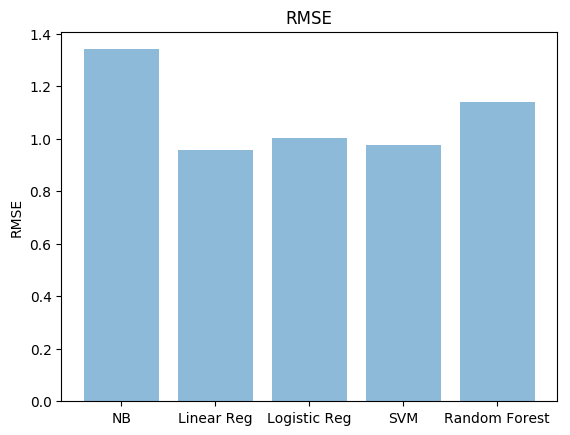

In [41]:
models = ('NB', 'Linear Reg', 'Logistic Reg', 'SVM', 'Random Forest')
y_pos = np.arange(len(models))
performance = [rmse(nb_predicted, test_op),rmse(lin_predicted, test_op),
               rmse(logr_predicted, test_op),rmse(svm_predicted, test_op),
               rmse(rf_predicted, test_op)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('RMSE')
 
plt.show()

For testing check all the reviews that are negative(rating less than 3) and find the rmse with that of predicted

In [42]:
neg_mask = test_op < 3
pos_mask = test_op >= 3
neg_test = test_op[neg_mask]
pos_test = test_op[pos_mask]

In [43]:
nb_neg_pred = nb_predicted[neg_mask]
nb_pos_pred = nb_predicted[pos_mask]
logr_neg_pred = logr_predicted[neg_mask]
logr_pos_pred = logr_predicted[pos_mask]
lin_neg_pred = lin_predicted[neg_mask]
lin_pos_pred = lin_predicted[pos_mask]
svm_neg_pred = svm_predicted[neg_mask]
svm_pos_pred = svm_predicted[pos_mask]
rf_neg_pred = rf_predicted[neg_mask]
rf_pos_pred = rf_predicted[pos_mask]

Print all the RMSE's for models

In [44]:
print ('Naive Bayes based RMSE for negative reviews is ' + str(rmse(nb_neg_pred, neg_test)))
print ('Naive Bayes based RMSE for positive reviews is ' + str(rmse(nb_pos_pred, pos_test)))

Naive Bayes based RMSE for negative reviews is 2.7838821814150108
Naive Bayes based RMSE for positive reviews is 1.0984587248722337


In [45]:
print ('Logistic Regression based RMSE for negative reviews is ' + str(rmse(logr_neg_pred, neg_test)))
print ('Logistic Regression based RMSE for positive reviews is ' + str(rmse(logr_pos_pred, pos_test)))

Logistic Regression based RMSE for negative reviews is 2.1984843263788196
Logistic Regression based RMSE for positive reviews is 0.7925270806437589


In [46]:
print ('Linear Regression based RMSE for negative reviews is ' + str(rmse(lin_neg_pred, neg_test)))
print ('Linear Regression based RMSE for positive reviews is ' + str(rmse(lin_pos_pred, pos_test)))

Linear Regression based RMSE for negative reviews is 2.079029375666111
Linear Regression based RMSE for positive reviews is 0.7611373561040988


In [47]:
print ('SVM based RMSE for negative reviews is ' + str(rmse(svm_neg_pred, neg_test)))
print ('SVM Regression based RMSE for positive reviews is ' + str(rmse(svm_pos_pred, pos_test)))

SVM based RMSE for negative reviews is 2.101586702153082
SVM Regression based RMSE for positive reviews is 0.7820295697311479


In [48]:
print ('Random forest based RMSE for negative reviews is ' + str(rmse(rf_neg_pred, neg_test)))
print ('Random Forest based RMSE for positive reviews is ' + str(rmse(rf_pos_pred, pos_test)))

Random forest based RMSE for negative reviews is 1.8929694486000912
Random Forest based RMSE for positive reviews is 1.036523113726489


Plot RMSE for negative and positive reviews

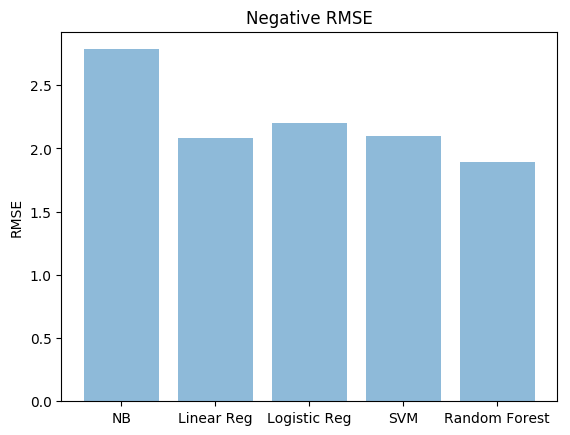

In [49]:
models = ('NB', 'Linear Reg', 'Logistic Reg', 'SVM', 'Random Forest')
y_pos = np.arange(len(models))
performance = [rmse(nb_neg_pred, neg_test),rmse(lin_neg_pred, neg_test),
               rmse(logr_neg_pred, neg_test),rmse(svm_neg_pred, neg_test),
               rmse(rf_neg_pred, neg_test)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('Negative RMSE')
 
plt.show()

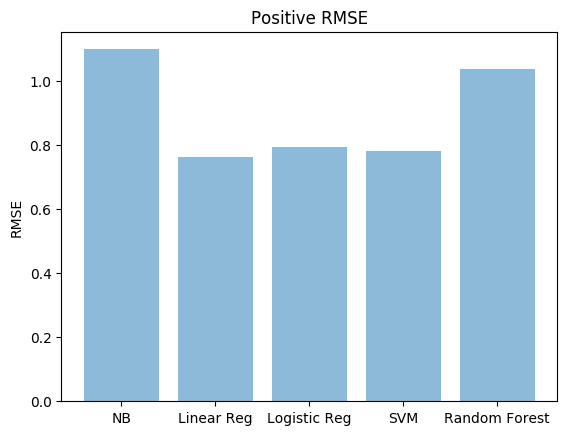

In [50]:
models = ('NB', 'Linear Reg', 'Logistic Reg', 'SVM', 'Random Forest')
y_pos = np.arange(len(models))
performance = [rmse(nb_pos_pred, pos_test),rmse(lin_pos_pred, pos_test),
               rmse(logr_pos_pred, pos_test),rmse(svm_pos_pred, pos_test),
               rmse(rf_pos_pred, pos_test)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('Positive RMSE')
 
plt.show()

Calculate the actual positive/negative reviews and predicted positive/negative reviews

In [51]:
actual_pos = int(np.sum(test_op >= 3))
nb_predicted_pos = int(np.sum(nb_predicted >= 3))
logr_predicted_pos = int(np.sum(logr_predicted >= 3))
lin_predicted_pos = int(np.sum(lin_predicted >= 3))
svm_predicted_pos = int(np.sum(svm_predicted >= 3))
rf_predicted_pos = int(np.sum(rf_predicted >= 3))

In [52]:
print ("Actual positve review are " + str(actual_pos))
print ("Naive Bayes predicted positive review are " + str(nb_predicted_pos))
print ("Logistic Regression predicted positive review are " + str(logr_predicted_pos))
print ("Linear Regression predicted positive review are " + str(lin_predicted_pos))
print ("SVM predicted positive review are " + str(svm_predicted_pos))
print ("Random Forest predicted positive review are " + str(rf_predicted_pos))

Actual positve review are 121
Naive Bayes predicted positive review are 124
Logistic Regression predicted positive review are 133
Linear Regression predicted positive review are 133
SVM predicted positive review are 133
Random Forest predicted positive review are 128


In [54]:
actual_neg = int(np.sum(test_op >= 3))
nb_predicted_neg = int(np.sum(nb_predicted >= 3))
logr_predicted_neg = int(np.sum(logr_predicted >= 3))
lin_predicted_neg = int(np.sum(lin_predicted >= 3))
svm_predicted_neg = int(np.sum(svm_predicted >= 3))
rf_predicted_neg = int(np.sum(rf_predicted >= 3))

In [55]:
print ("Actual negative review are " + str(actual_neg))
print ("Naive Bayes predicted negative review are " + str(nb_predicted_neg))
print ("Logistic Regression predicted negative review are " + str(logr_predicted_neg))
print ("Linear Regression predicted negative review are " + str(lin_predicted_neg))
print ("SVM predicted positive negative are " + str(svm_predicted_neg))
print ("Random Forest predicted negative review are " + str(rf_predicted_neg))

Actual negative review are 121
Naive Bayes predicted negative review are 124
Logistic Regression predicted negative review are 133
Linear Regression predicted negative review are 133
SVM predicted positive negative are 133
Random Forest predicted negative review are 128
